## https://scikit-learn.org/stable/user_guide.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Datasets/PozisyonSeviyeMaas.csv")

# Veri Keşfi

In [4]:
df.head(10)

,Pozisyon,Seviye,Maas
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Pozisyon    10 non-null object
Seviye      10 non-null int64
Maas        10 non-null int64
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


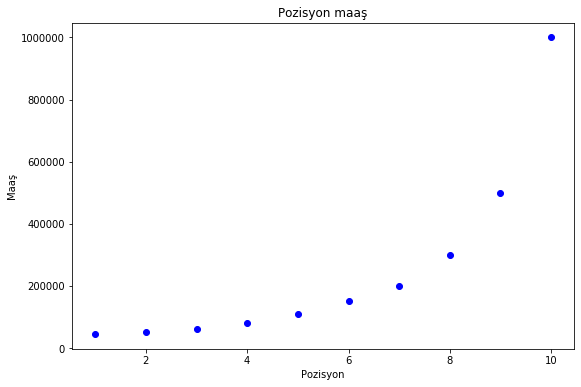

In [6]:
plt.figure(figsize=(9,6))
plt.scatter(df['Seviye'], df['Maas'], color='blue')
plt.title("Pozisyon maaş")
plt.xlabel("Pozisyon")
plt.ylabel("Maaş")
plt.show()

# Veri setini X ve y olarak ayırma (Dikey bölme)

In [7]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [8]:
print(X.shape)
print(y.shape)

(10, 1)
(10,)


# Polinom Regresyon için Ön Hazırlık

In [9]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

In [10]:
X_poly.shape

(10, 3)

In [11]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

# Polinom Lineer Regresyon ile Modeli Eğitmek

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Polinom Regresyon Modelin Grafiğini Çizmek

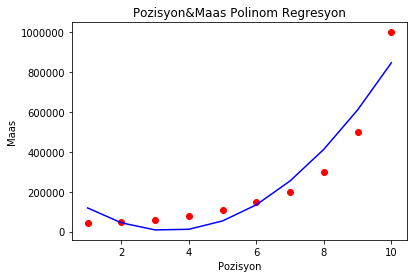

In [13]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X_poly), color = 'blue')
plt.title('Pozisyon&Maas Polinom Regresyon')
plt.xlabel('Pozisyon')
plt.ylabel('Maas')
plt.show()

# Tahmin Yapma

In [14]:
# Tahmin edilecek veri hazırlığı. Bir niteliğ polinom dönüşüme tabi tutup model kurmuştuk.
# Tahmin etmek istediğimiz pozisyon değerlerini de dönüştürüp modele vermek zorundayız.
deger = 6.7
tahmin_edilecek_pozisyon = poly_reg.fit_transform(np.array(deger).reshape(-1, 1))
print(tahmin_edilecek_pozisyon)

[[ 1.    6.7  44.89]]


In [15]:
tahmin_edilecek_pozisyon.shape

(1, 3)

In [16]:
# Yukarıda dönüşüm tamamlandı. Şimdi sonuç isteyelim
lin_reg.predict(tahmin_edilecek_pozisyon)

array([214223.86363636])

# Veri Seti ile tahmin yapma

In [17]:
y_pred = lin_reg.predict(poly_reg.fit_transform(X))

In [18]:
y_pred

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

In [19]:
# Formatımızı bozmayalım hep y_test kullandık
y_test = y.copy()

In [20]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head(20)

,y_pred,y_test
0,118727.272727,45000
1,44151.515152,50000
2,8439.393939,60000
3,11590.909091,80000
4,53606.060606,110000
5,134484.848485,150000
6,254227.272727,200000
7,412833.333333,300000
8,610303.030303,500000
9,846636.363636,1000000


In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_true=y_test, y_pred=y_pred)

0.9162082221443942

<h1 style="color:blue";>09_non_linear_regression_alıştırma - 1</h1>

In [26]:
# PozisyonSeviyeMaas.csv 
# veri seti ile basit doğrusal regresyon yapınız.
# Sonuçları polinom regresyon ile karşılaştırınız